In [2]:
!pip install tensorflow

     -------------------------------------- 300.9/300.9 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 21.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ------------------------------------- 413.4/413.4 kB 25.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 442.0/442.0 kB ? eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 25.4 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 29.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.4 MB/s eta 0:00:00
     ---------------------------------------- 130.2/130.2 kB ? eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 39.3 MB/s eta 0:00:00
     ------------------------------------- 938.6/938.6 kB 29.9 MB/s eta 0:00:00
     ------------------------------------- 422.5/422.5 kB 13.

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split



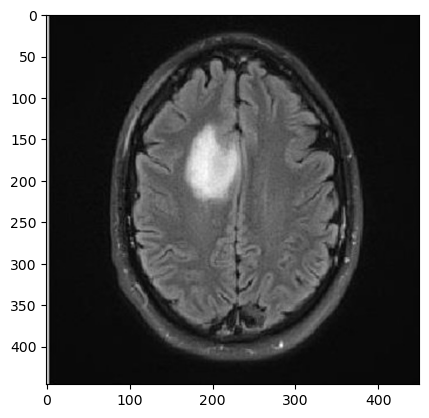

In [11]:
img = image.load_img("C:\\Users\\medha\\Downloads\\brain_images_dataset\\brain_tumor_dataset\\yes\\Y8.jpg")
plt.imshow(img)

In [12]:

# Use ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create data generators
train_generator = datagen.flow_from_directory(
    "C:\\Users\\medha\\Downloads\\brain_images_dataset\\brain_tumor_dataset",
    target_size=(240, 240),  # Adjust according to your image size
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    "C:\\Users\\medha\\Downloads\\brain_images_dataset\\testing",
    target_size=(240, 240),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 203 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [13]:
# Define your CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
epochs = 10  

model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 119, 119, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 200704)          